In [1]:
import numpy as np

##### MATRIX EIGENVALUE PROBLEM : Write in your own words how does the EIG command work on pseudocode level (enough to explain the mathematics behind it). Also write out the main formulae in Jupyter Notebook. 


EIG command return the eigne values and eigen vector of square matrix.

Let  be a square matrix. A non-zero vector v is an eigenvector for A with eigenvalue  $\lambda$ if  \begin{equation*} Av = \lambda v \end{equation*}

We can write the above equation as 
\begin{align}
Av  - \lambda v =0 \\
v(A  - \lambda I) =0
\end{align}

where $I$ is the identity matrix of the same dimensions as A.
Assuming that $v$ is not null-vectorThe last equation can be solved only when matrix A is singular, that is its determinant is zero. 
Therefore, to find the eigen vectors of A, we have to solve the following equation.
\begin{align}
Det(A  - \lambda I) =0
\end{align}




#### Show mathematically how the vector form of Covariance Matrix representation can be deduced from the matrix form (you can choose your own denotation for eigenvectors) 

Choose $u$=$v$=$[\vec{u_1},\vec{u_2}, ...,\vec{u_d}]$ then <br/>
$\sum =[ \vec{u_1},\vec{u_2}, ...,\vec{u_d}] 
\begin{bmatrix} \lambda_i & 0 & 0 \\ 0 & \lambda_j & 0 \\ 0 & 0 & \lambda_d\end{bmatrix}[ \vec{u_1},\vec{u_2}, ..., \vec{u_d}]^T$ <br/>
$=[ \vec{u_1},\vec{u_2}, ...,\vec{u_d}].\begin{bmatrix} \lambda_1 u_1 \\ \lambda_2 u_2  \\ \vdots  \\  \lambda_d u_d\end{bmatrix}$ <br/>
$ = \lambda_1 u_1 u_1^T + \lambda_2 u_2 u_2^T+ \lambda_2 u_2 u_2^T+ .... +\lambda_d u_d u_d^T$ <br/>
$=\lambda_i u_i u_i^T  $
$  = \sum \limits _{i=1} ^{D}\lambda_i u_i u_i^T$

#### Replicate all the steps of https://sebastianraschka.com/Articles/2014_pca_step_by_step.html up to the end of point 5. You don't need to do point 3)a because our focus is on the Covariance matrix. 

In [4]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [5]:
cov_mat1

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [6]:
class1_sample

array([[ 0.53724312, -0.24869199,  0.1337568 ,  0.86132722, -0.36529791,
        -0.17998151, -0.34967467,  0.55649651,  0.79961516,  0.58898334,
        -1.84406833, -1.1048449 , -0.76322356, -0.70361282, -1.28147512,
        -2.87887204,  1.38172985,  0.50579405, -0.12549037,  0.61913564],
       [-0.12593169, -1.10517978, -2.00975645, -0.45030826,  0.59329914,
        -0.0437724 , -0.11113985,  1.05023016,  1.2078049 , -0.05583495,
        -0.60547604, -0.27887989,  1.17671488,  0.45700263,  1.44288786,
         0.37630319,  0.24766564,  0.36706446, -0.44121741,  1.11372231],
       [ 0.38544769, -0.67447423,  0.12455016,  0.3072942 ,  0.38446206,
         0.72483986, -1.8442552 ,  0.45461806,  0.17930616, -1.15726886,
        -0.00400469,  1.44770012,  1.22345212,  0.29887362, -0.61655143,
        -0.81133205,  0.15973045,  0.59595232, -0.54879645, -0.10122292]])

In [7]:
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


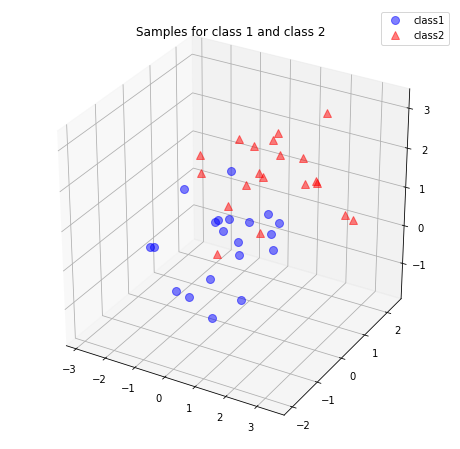

In [8]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

### 1 Take whole dataset

In [17]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"
all_samples

-1.8440683335315493

### 2. Compute D-dimensional mean vector

In [12]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)
mean_vector.shape

Mean Vector:
 [[0.2084064 ]
 [0.67206841]
 [0.68534588]]


(3, 1)

In [18]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.37625181 0.38477169 0.38355817]
 [0.38477169 0.8304721  0.33389092]
 [0.38355817 0.33389092 1.21630538]]


In [19]:
# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

### 5.1. Sorting the eigenvectors by decreasing eigenvalues

In [20]:
for ev in eig_vec_cov:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [23]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i)

(1.9250131681818599, array([-0.69921402, -0.42186672, -0.57717261]))
(0.9051304832422944, array([-0.65040695,  0.04024302,  0.75851915]))
(0.5928856391602906, array([ 0.29676682, -0.9057643 ,  0.30252353]))


#### 5.2. Choosing k eigenvectors with the largest eigenvalues

In [24]:
## combining the two eigenvectors with the 
## highest eigenvalues to construct our d×k-dimensional eigenvector matrix W
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)



Matrix W:
 [[-0.69921402 -0.65040695]
 [-0.42186672  0.04024302]
 [-0.57717261  0.75851915]]
